In [2]:
from __future__ import division
from __future__ import print_function
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#from bokeh.plotting import figure, output_file, show
#from bokeh.io import output_notebook

/Users/qiaoqiaozhu/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#import os
from numpy.random import randn
import scipy.stats as stats

np.random.seed(12345)
# Set inline figure size 
plt.rc('figure', figsize=(14, 8))
np.set_printoptions(precision=4)

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import pandas_datareader.data as web
import datetime
from IPython.display import Image
%load_ext rpy2.ipython

/Users/qiaoqiaozhu/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: DBI

  warnings.warn(x, RRuntimeWarning)


# FINM8006 Advanced Investment 
## Math Review
---
Qiaoqiao Zhu   
Australian National University

## Math We Use
* Basic calculus
* Basic matrix algebra
* Basic unconstrained and constrained maximization
* Basic statistics, Linea regression

## Basic Calculus

### Derivative formula cheat sheet
If $ f(x) $ and $ g(x) $ are differentiable functions, c and n are any real numbers,
 * $ (cf)' = cf' $
 * $(f\pm g)'= f'\pm g' $
 * $(fg)'=f′g+fg′ $ –Product Rule
 * $(x^{n})'=nx^{n-1}$ -Power Rule
 * $f(g(x))'=f′(g(x))g′(x)$ -Chain Rule

### Some Common Derivatives
 * $\frac{d }{dx}a^x=a^{x}\ln a $
 * $\frac{d }{dx}e^x=e^{x} $
 * $\frac{d }{dx}ln(x)= \frac{1}{x} $

### First Order Approximation

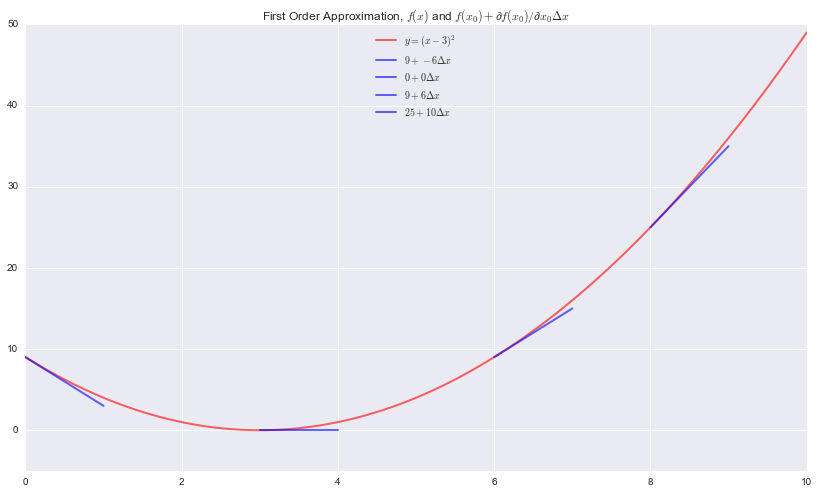

In [22]:
# ploting first order derivarives
fig, ax = plt.subplots()
x = np.linspace(0, 10, 200)
y = (x-3)**2
ax.plot(x, y, 'r-', linewidth=2, label=r'$y=(x-3)^2$', alpha=0.6)
for x0 in [0, 3, 6, 8]:
    fd=2*(x0-3)
    y0 = (x0-3)**2
    z = np.linspace(x0, x0+1, 50)
    ax.plot(z, y0+fd*(z-x0), 'b-', linewidth=2, label=r'$ %i+%i\Delta x $' %(y0, fd), alpha=0.6) 
ax.set_ylim([-5,50])
ax.legend(loc='upper center')
ax.set_title('First Order Approximation, $f(x)$ and $f(x_{0})+\partial f(x_{0})/\partial x_{0} \Delta x$')
plt.show()

The draw back of FOA is that we do not take into account the curvature of the function. The higher the curvature the bigger the error. 

### Taylor series expansion
In general, for a real function $f(.)$, given initial point $x_{0}$ and deviation from $x_{0}$: $h \equiv x-x_{0}$, we have
$$
f(x)\equiv f(x_{0}+h) = f(x_{0})+f^{\prime}(x_{0})h+\frac{1}{2!}f^{\prime\prime}(x_{0})h^{2}+\frac{1}{3!}f^{(3)}(x_{0})h^{3}+\cdots
$$
For the first two order approximation
* first-order approximation $f(x)\approx f(x_{0})+f^{\prime}(x_{0})h $
* second-order approximation $f(x)\approx f(x_{0})+f^{\prime}(x_{0})h+\frac{1}{2}f^{\prime\prime}(x_{0})h^{2}$

#### Log Price Return Approximation
$$ ln(1+h)=ln(1)+\frac{1}{1+0}h+O^{n}\approx h $$
Therefore
$$ ln(p_{t})-ln(p_{t-1})=ln(\frac{p_{t}}{p_{t-1}})=ln(1+\frac{p_{t}-p_{t-1}}{p_{t-1}})$$
$$\approx  \frac{p_{t}-p_{t-1}}{p_{t-1}} =r $$

### Return and Price Distributions Again

Remember that we can reseaonablly approximate return distribution as normal distributions. The questions now is that whether we can indeed get normal distribution if we draw returns from a normal distribution (with moments consistenet with data). Let's simulate this. 

In [23]:
def simret(n, mu=0.0062, sigma=0.0436): # mean and standard deviation
    from scipy.stats import norm
    s = np.random.normal(mu, sigma, n)
    fig, ax = plt.subplots()
    xmin, xmax = -3 * sigma, 3 * sigma
    ax.set_xlim(xmin, xmax)
    ax.hist(s, bins=60, alpha=0.5, normed=True)
    xgrid = np.linspace(xmin, xmax, 200)
    ax.plot(xgrid, norm.pdf(xgrid-mu, scale=sigma), 'k-', lw=2, label=r'$N(\mu, \sigma^2)$')
    ax.legend()
    plt.show()

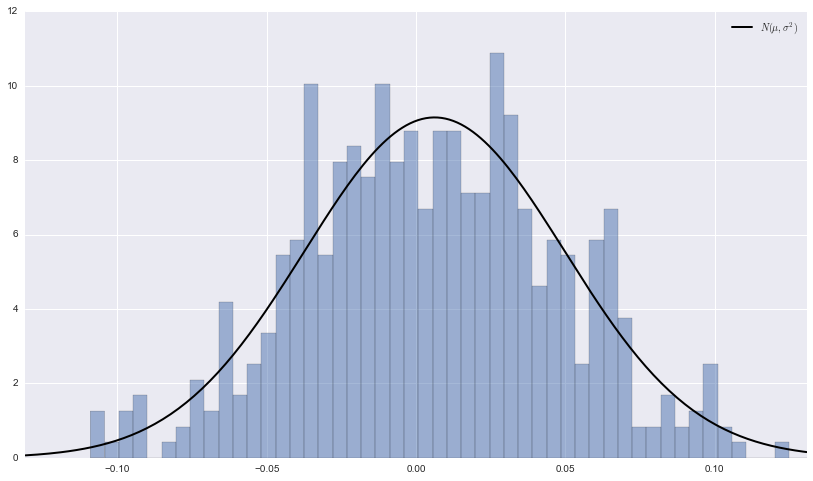

In [24]:
simret(500, mu=0.0062, sigma=0.0436)

#### Central Limit Theorem

In fact, if we have a sequency of sample of $X_{1} \cdot X_{n}$ from IID (Identical Independent Distribution of finite variance, with common mean $\mu$ and variance $\sigma^2$, then 

$$ \sqrt n (\bar X_{n}-\mu) \rightarrow N(0, \sigma^2) \quad \text{   as   } n\rightarrow \infty $$

That's called Central Limit Theorem (CLT)

Here is a simulation of exponential distribution (lambda=0.5). Draw 250 sample at a time for 100000 times. 

pdf of exposential distributions. They are very different from normal distribution


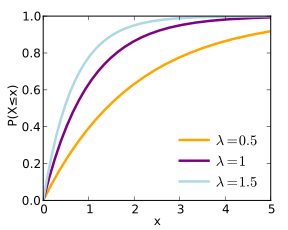

In [1]:
print('pdf of exposential distributions. They are very different from normal distribution')
from IPython.display import SVG
SVG(url='https://upload.wikimedia.org/wikipedia/commons/b/ba/Exponential_cdf.svg')

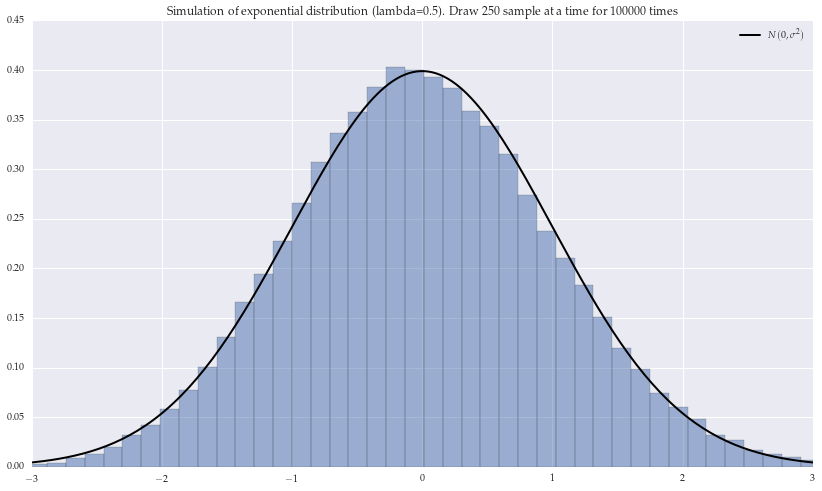

In [4]:
from scipy.stats import expon, norm
from matplotlib import rc

# == Specifying font, needs LaTeX integration == #
rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)

# == Set parameters == #
n = 250     # Choice of n
k = 100000  # Number of draws of Y_n
distribution = expon(2)  # Exponential distribution, lambda = 1/2
mu, s = distribution.mean(), distribution.std()

# == Draw underlying RVs. Each row contains a draw of X_1,..,X_n == #
data = distribution.rvs((k, n))
# == Compute mean of each row, producing k draws of \bar X_n == #
sample_means = data.mean(axis=1)
# == Generate observations of Y_n == #
Y = np.sqrt(n) * (sample_means - mu)

# == Plot == #
fig, ax = plt.subplots()
xmin, xmax = -3 * s, 3 * s
ax.set_xlim(xmin, xmax)
ax.hist(Y, bins=60, alpha=0.5, normed=True)
xgrid = np.linspace(xmin, xmax, 200)
ax.plot(xgrid, norm.pdf(xgrid, scale=s), 'k-', lw=2, label=r'$N(0, \sigma^2)$')
ax.set_title('Simulation of exponential distribution (lambda=0.5). Draw 250 sample at a time for 100000 times')
ax.legend()

plt.show()

#### Lognormal Price Distribution

Since return is distributed normal, price is lognormal distribution. 

Let's see a simulation

In [5]:
def plotlognormal(mu=0.05, sigma = 0.1 ):#0.0062, 0.0436 # mean and standard deviation
    s = np.random.lognormal(mu, sigma, 1000)
    count, bins, ignored = plt.hist(s, 100, normed=True, align='mid')
    x = np.linspace(min(bins), max(bins), 10000)
    pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))
    plt.plot(x, pdf, linewidth=2, color='r')
    plt.axis('tight')
    plt.title('Lognormal Distribution')
    plt.show()

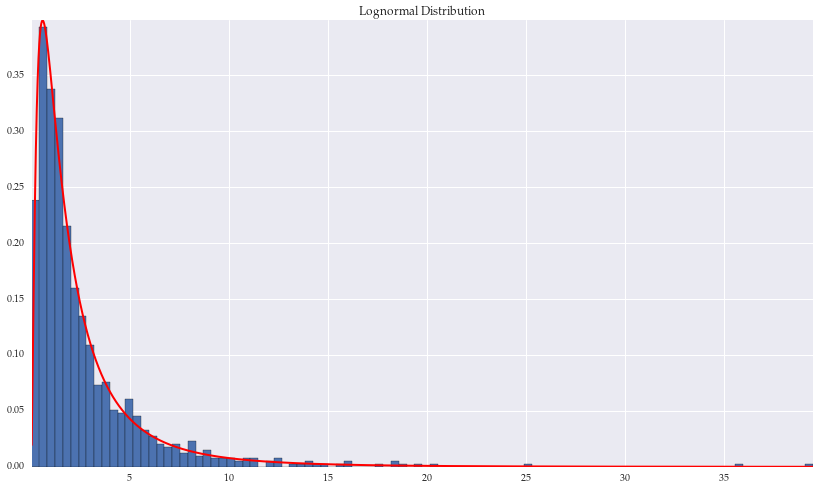

In [6]:
plotlognormal(mu=0.5, sigma = 1. )

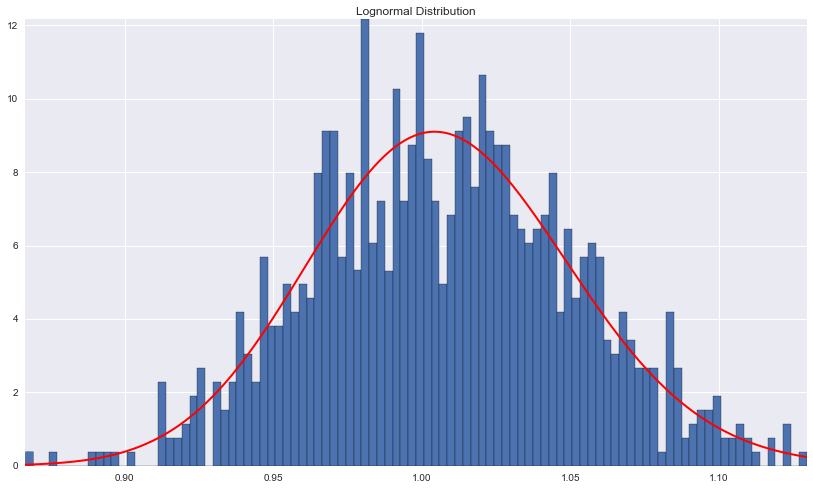

In [31]:
plotlognormal(mu=0.0062, sigma = 0.0436 )

#### Random walk

Now we have the distribution, what about the random part?

Imagine a world in which news (i.e., information) about the world arrive randomly. Then the shock to the asset price $\Delta ln(p)$ should also be random. 

You might have objection to this assumption, since sometimes news go in a bunch. But even news can be correlated, surprises (i.e., information not yet priced) can still be random. In any case, our simulation tells us that lag information in daily returns hardly helps in beating the normal distribution.  

In [24]:
Image(url='http://ecx.images-amazon.com/images/I/51DcS65nR1L.jpg')

Here's how price would look like if return follows a random walk with drift mu

In [9]:
def geometric_brownian_motion(T = 1, N = 100, mu = 0.0062, sigma = 0.0436, S0 = 20):        
    dt = float(T)/N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) ### geometric brownian motion ###
    return S

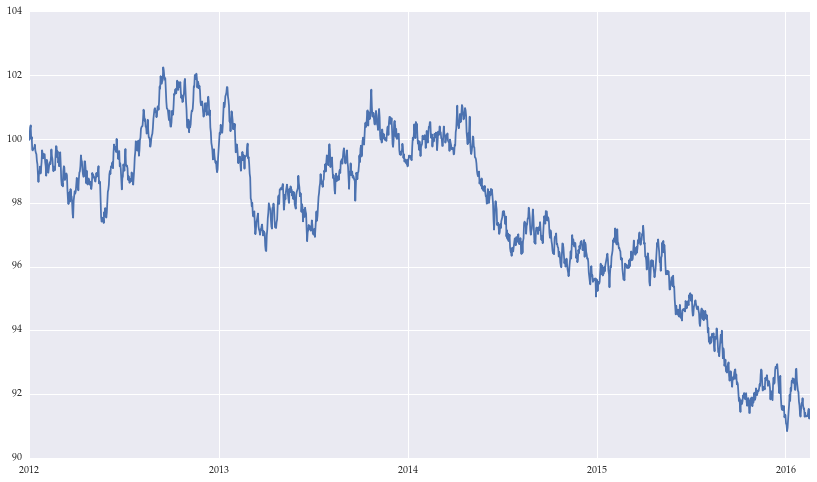

In [11]:
dates = pd.date_range('2012-01-01', '2016-02-18')
T = (dates.max()-dates.min()).days / 365
N = dates.size
start_price = 100
y = pd.Series(
    geometric_brownian_motion(T, N, sigma=0.0436, S0=start_price), index=dates)
y.plot()
plt.show()

#### information and conditional probability
* Information when you have price limits
   * magnetic effect around price limists in Chinese markets
* Monty Hall Problem and conditional probabilities

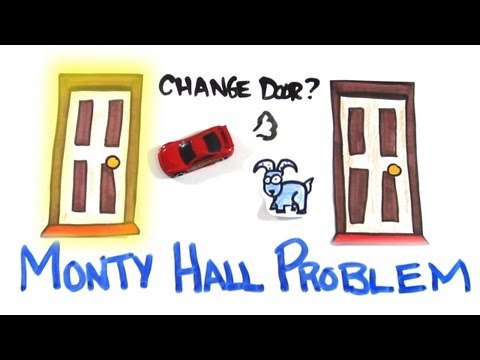

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("9vRUxbzJZ9Y", width=600, height=450)

In [13]:
%run opycodes/montyhall.py


One million Monty Hall games (with switching):
  won: 665816 games
  lost: 334184 games
  odds: 66.58% winning percentage
One million Monty Hall games (staying with original choice)
('  won:', 332983, 'games')
('  lost:', 667017, 'games')
  odds: 33.30% winning percentage



## Matrix Algebra

Matrix is a rectangular array of numbers. Consider a $m\times n$ matrix $\mathbf{A}$
$$
\mathbf{A}=\left[
\begin{array}{cccc}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}%
\end{array}%
\right]
$$

* A matrix that contains only $1$ column or row is called a vector.

### addition, multiplication, transpose, inverse

In [15]:
a = np.matrix('1 2; 3 4')
print(a)

[[1 2]
 [3 4]]


In [16]:
# transpose
print('b = transpose(a):')
b = a.T
print(b)

b = transpose(a):
[[1 3]
 [2 4]]


In [17]:

print('a+b:')
a+b

a+b:


matrix([[2, 5],
        [5, 8]])

In [14]:
print ('2*a:')
2*a

2*a:


matrix([[2, 4],
        [6, 8]])

In [18]:
# matrix multiplication, dimension must match
print('c = a*b:')
c =a.dot(b)
print(c)

c = a*b:
[[ 5 11]
 [11 25]]


In [18]:
# Inverse, $A^(-1)$
print('b = inverse(a):')
b = a.I
print(b)

b = inverse(a):
[[-2.   1. ]
 [ 1.5 -0.5]]


In [20]:
print('matrix multiplied by own inverse, a*b=:')
Identity = a.dot(b)
print(Identity)

matrix multiplied by own inverse, a*b=:
[[  1.0000e+00   0.0000e+00]
 [  8.8818e-16   1.0000e+00]]


### Finance application Examples

Example: Returns of Portfolio

Return of a portfolio with weight $w_{i}$ in asset $i$ is $r_{p}=\sum_{i}w_{i}r_{i}$. In matrix representation, we can simply write
$$r_{p}=w'\times r$$,
where $$ w' = \begin{pmatrix} w_{1} & w_{2} &\cdots & w_{i} \end{pmatrix} $$
and $$ r = \begin{pmatrix} r_{1} \\ r_{2} \\ \vdots \\ r_{i} \end{pmatrix} $$

Variance of portfolio

$$var(r_{p}) = var(w'r) = w'\Sigma w$$
where $\Sigma$ is the symmetric variance-covariance matrix. 
$$
\left[
\begin{array}{cccc}
\sigma^2_{11} & \sigma_{12} & \cdots & \sigma_{1i} \\
\sigma_{21} & \sigma^2_{22} & \cdots & \sigma_{2i} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{i1} & \sigma_{i2} & \cdots & \sigma^2_{ii}%
\end{array}%
\right]
$$

You can similarly compute covariance of two portfolios with weight vectors $x$ and $y$. (try it yourself). 

### Derivatives of Vector Functions

Let $\mathbf{x}$ and $\mathbf{y}$ be vectors of orders n and m respectively:
$$ \mathbf{x} = \begin{pmatrix} x_{1} \\ x_{2} \\ \vdots \\ x_{n} \end{pmatrix} \quad \text{and } 
\mathbf{y} = \begin{pmatrix} y_{1} \\ y_{2} \\ \vdots \\ y_{m} \end{pmatrix} $$

where each component $y_i$ may be a function of all the $x_j$, a fact represented by saying that $\mathbf{y}$ is a
function of $\mathbf{x}$, or $\mathbf{y=y(x)}$

If n = 1, $\mathbf{x}$ reduces to a scalar, which we call x. If m = 1, $\mathbf{y}$ reduces to a scalar, which we call y.

The derivative of the vector y with respect to vector x is the n × m matrix

$$
\dfrac{\partial \mathbf{y}}{\partial \mathbf{x}} =
\left[
\begin{array}{cccc}
\dfrac{\partial y_{1}}{\partial x_{1}} & \dfrac{\partial y_{2}}{\partial x_{1}} & \cdots & \dfrac{\partial y_{m}}{\partial x_{1}}\\
\dfrac{\partial y_{1}}{\partial x_{2}} & \dfrac{\partial y_{2}}{\partial x_{2}} & \cdots & \dfrac{\partial y_{m}}{\partial x_{2}} \\
\vdots & \vdots & \ddots & \vdots \\
\dfrac{\partial y_{1}}{\partial x_{n}} & \dfrac{\partial y_{2}}{\partial x_{n}} & \cdots & \dfrac{\partial y_{m}}{\partial x_{n}}
\end{array}
\right]
$$



* If y is a scalar
$$ \dfrac{\partial{y}}{\partial\mathbf{x}}  = \begin{pmatrix} \dfrac{\partial y}{\partial x_{1}} \\ \dfrac{\partial y}{\partial x_{2}} \\ \vdots \\ \dfrac{\partial y}{\partial x_{n}} \end{pmatrix} $$
* If x is a scalar
$$ \dfrac{\partial\mathbf{y}}{\partial x}  = \begin{pmatrix} \dfrac{\partial \mathbf{y}}{\partial x} & \dfrac{\partial \mathbf{y}}{\partial x} & \cdots & \dfrac{\partial \mathbf{y}}{\partial x} \end{pmatrix} $$

#### Useful Vector Derivative Formulas

| $\mathbf{y}$              |$\dfrac{\partial \mathbf{y}}{\partial \mathbf{x}}$    |
| -----------------------|-----------------------------------------------|
|  $A\mathbf{x}$            |$A^{T}$               |
| $\mathbf{x}^{T}A$         |$A$                                             |
| $\mathbf{x}^{T}\mathbf x$    |$2\mathbf x$                                       |
| $\mathbf x^{T}A\mathbf{x}$  |$A\mathbf{x}+A^{T}\mathbf{x}$                       | 

### Linear systems

A linear system of n equations and n unknowns can be represented by matrix as
$\mathbf{Ax=b}$. For example,
$$a_{11}x_{1}+a_{12}x_{2} =b_{1} $$
$$a_{21}x_{1}+a_{22}x_{2} =b_{2} $$
 can be written in the matrix form:
$$
\underset{\mathbf{A}}{\underbrace{\left[
\begin{array}{cc}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{array}%
\right] }}\underset{\mathbf{x}}{\underbrace{\left[
\begin{array}{c}
x_{1} \\
x_{2}
\end{array}
\right] }}=\underset{\mathbf{b}}{\underbrace{\left[
\begin{array}{c}
b_{1} \\
b_{2}
\end{array}
\right] }}
$$
We can use matrix operation to solve the equations
$$\mathbf{x=A^{-1}b}$$

### Graph represenation of vectors and space

In [3]:
a=np.array([3,3])
b=np.array([2,1])
c = a-b
print('[3,3]-[2,1]=', c)

[3,3]-[2,1]= [1 2]


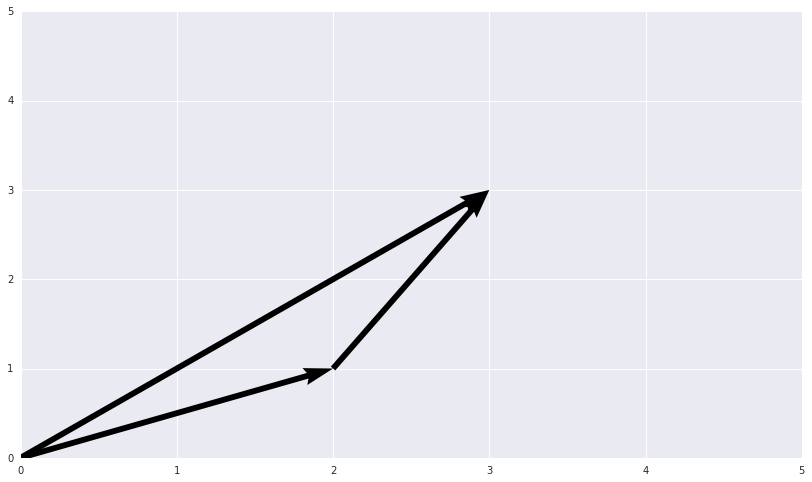

In [69]:
# The two c vectors are the same

a =np.array([0,0,3,3]) 
b =np.array([0,0,2,1]) 
#c = a - b
c = np.concatenate((b[-2:],(a-b)[-2:]), 0)
X,Y,U,V = zip(a, b, c)
plt.figure()
ax = plt.gca()
ax.quiver(X,Y,U,V,angles='xy',scale_units='xy',scale=1)
ax.set_xlim([0,5])
ax.set_ylim([0,5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.draw()
plt.show()

#### Colinearity 

In [22]:
a=np.array([3,3])
b=np.array([2,1])
c=2*b
c=np.matrix([a, b, c])
print(c)
# matrix rank
print('Rank of the above matrix=', np.linalg.matrix_rank(c, tol=None))

[[3 3]
 [2 1]
 [4 2]]
Rank of the above matrix= 2


## Maximization

### Scalar Optimization
a continuous smooth function  $f(x)$ has maxima when
* $f'(x)=0$
* $f(x)$ is concave, i.e., $f''(x)\leq 0$

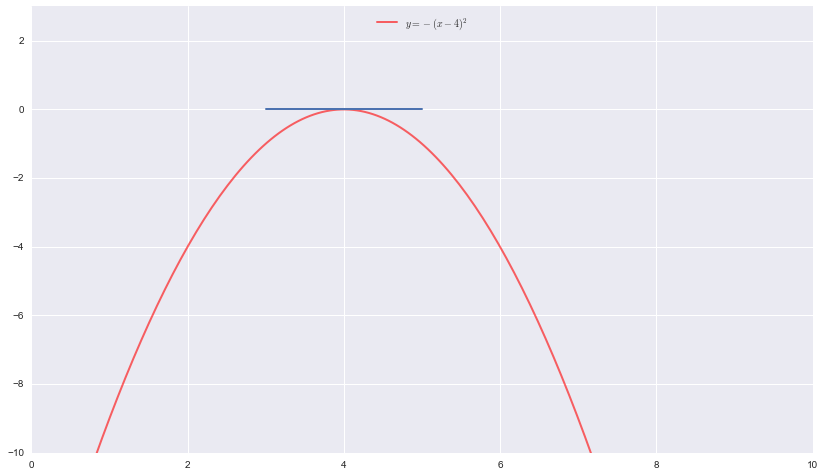

In [4]:
fig, ax = plt.subplots()
x = np.linspace(0, 10, 200)
y = -(x-4)**2
ax.plot(x, y, 'r-', linewidth=2, label=r'$y=-(x-4)^2$', alpha=0.6)
z = np.linspace(3, 5, 200)
fd=0*np.ones(len(z))
ax.plot(z, fd, linewidth=2)
ax.legend(loc='upper center')
ax.set_ylim([-10,3])
plt.show()

In [5]:
from sympy import *
init_printing(use_latex='mathjax')

x, f= symbols('x f')
f = diff(-(x-4)**2, x)
print('first differential of', -(x-4)**2, f)

('first differential of', -(x - 4)**2, -2*x + 8)


In [26]:
print('set the first differential equation to 0, we get:', solve(f, x), '\nmaximium point')

set the first differential equation to 0, we get: [4] 
maximium point


Notice that maximization is the same as  $\min -f(x)$

In [28]:
print('Numerical solution searching, we get:')
from scipy import optimize as opt
def f(x):
    return (x-4)**2
#opt.minimize_scalar(f, method='Brent')
opt.minimize_scalar(f, method='bounded', bounds=[0, 8])

Numerical solution searching, we get:


  status: 0
    nfev: 6
 success: True
     fun: 0.0
       x: 4.0
 message: 'Solution found.'

### Extending to $x \in \mathbf{R^{n}}$
Let $F(x): U \rightarrow \mathbf{R^{1}}$ be a $C^2$ function, where $x \in \mathbf{R^{n}}$, $f(x)$ has maxima when
* FOC:
$$
\frac{\partial F}{\partial x_{i}}(x^*)=0  \qquad \text{for}  \quad i=1, \cdots, n.
$$
* SOC: $F(x)$ is concave, i.e., matrix of second derivative is netative definite


Example 

$$ \max \quad -((x_{1}-1)^{2}+ x_{2}^{2})  $$

In [30]:
# Check Hessian
from sympy import symbols, hessian, Function, N

x1, x2 = symbols('x1 x2')
f = symbols('f', cls=Function)

f = -((x1-1)**2 + (x2)**2)
H = hessian(f, [x1, x2]).subs([(x1,1), (x2,1)])
print('Hessian:\n', np.array(H))
#print(N(H.condition_number()))

Hessian:
 [[-2 0]
 [0 -2]]


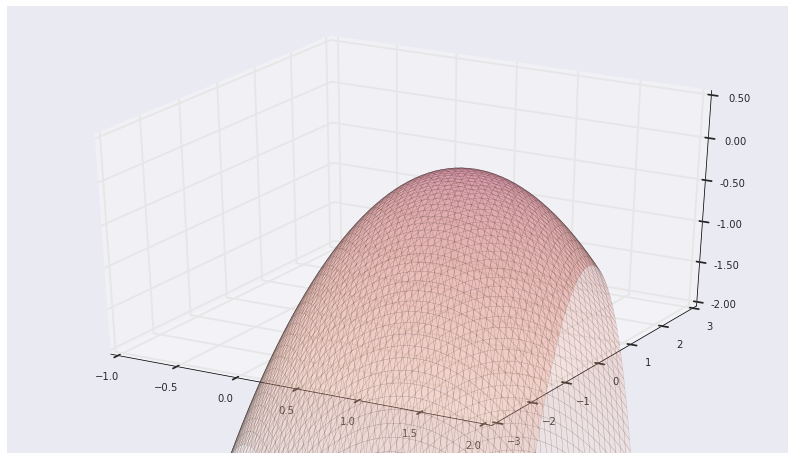

In [158]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-1, 2, 0.05)
Y = np.arange(-2.5, 2.5, 0.05)
X, Y = np.meshgrid(X, Y)
Z = -((X-1)**2 + (Y)**2)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2, cmap=cm.coolwarm)
ax.set_zlim(-2, 0.5)

#cset = ax.contour(X, Y, Z, zdir='z', offset=-2, cmap=cm.coolwarm)
#cset = ax.contour(X, Y, Z, zdir='x', offset=-2, cmap=cm.coolwarm)
#cset = ax.contour(X, Y, Z, zdir='y', offset=2, cmap=cm.coolwarm)

ax.zaxis.set_major_locator(LinearLocator(6))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.w_xaxis.set_pane_color((1, 1, 1, 0.3))
ax.w_yaxis.set_pane_color((1,1,1, 0.3))
ax.w_zaxis.set_pane_color((1, 1, 1, 0.4))
plt.show()

FOC
 * $2(x_{1}-1)=0 \Rightarrow x^*_{1}=1 $
 * $2x_{2}=0 \Rightarrow x^*_{2}=0$

### Level Curve
Level curves are the projection of $f(x_{1}, x_{2})$ onto the $(x_{1}, x_{2})$ plane.

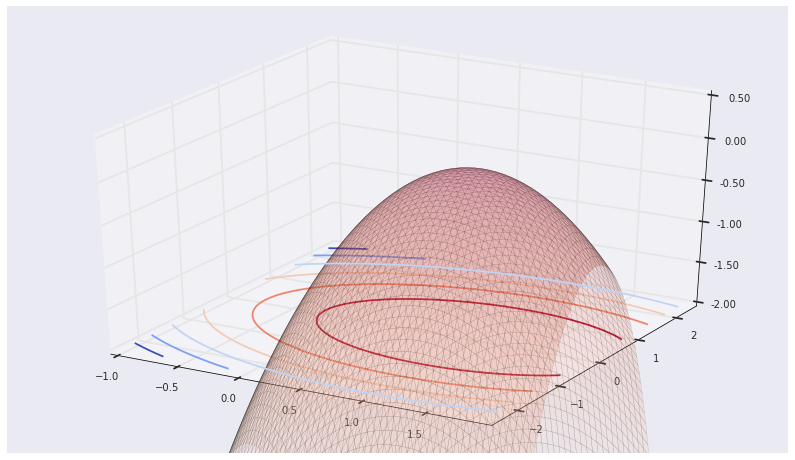

In [165]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-1, 2, 0.05)
Y = np.arange(-2.5, 2.5, 0.05)
X, Y = np.meshgrid(X, Y)
Z = -((X-1)**2 + (Y)**2)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2, cmap=cm.coolwarm)
ax.set_zlim(-2, 0.5)

cset = ax.contour(X, Y, Z, zdir='z', offset=-2, cmap=cm.coolwarm)
#cset = ax.contour(X, Y, Z, zdir='x', offset=-2, cmap=cm.coolwarm)
#cset = ax.contour(X, Y, Z, zdir='y', offset=2, cmap=cm.coolwarm)

ax.zaxis.set_major_locator(LinearLocator(6))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.w_xaxis.set_pane_color((1, 1, 1, 0.3))
ax.w_yaxis.set_pane_color((1,1,1, 0.3))
ax.w_zaxis.set_pane_color((1, 1, 1, 0.4))
plt.show()

### Constraint

Suppose we now have constraint that $x_{1}+x_{2} \leq -1.5$

so the problem we solve bebomes

$$ \max \quad -((x_{1}-1)^{2}+ x_{2}^{2})  $$
such that $$x_{1}+x_{2} \leq -1.5$$

constraint in $(x_{1}, x_{2})$ coordinates

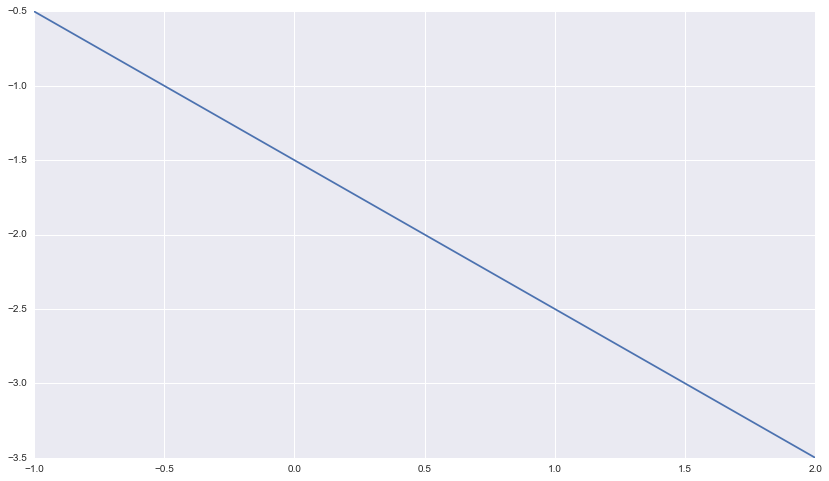

In [19]:
def showconstraint(showregion=False, showlevel=False):
    fig, ax = plt.subplots()
    X = np.arange(-1, 2, 0.05)
    Y = np.arange(-2.5, 2.5, 0.05)
    X, Y = np.meshgrid(X, Y)
    Z = -((X-1)**2 + (Y)**2)
    x = np.linspace(-1, 2, 50)
    # C is constrain
    C = -x-1.5
    if showlevel==True:
        plt.contour(X, Y, Z)
    plt.plot(x, C)
    yb=ax.get_ylim()[0]
    if showregion==True:
        ax.fill_between(x, yb, C)
    plt.show()
showconstraint(showregion=False, showlevel=False)

possible region of  $(x_{1}, x_{2})$ for solution

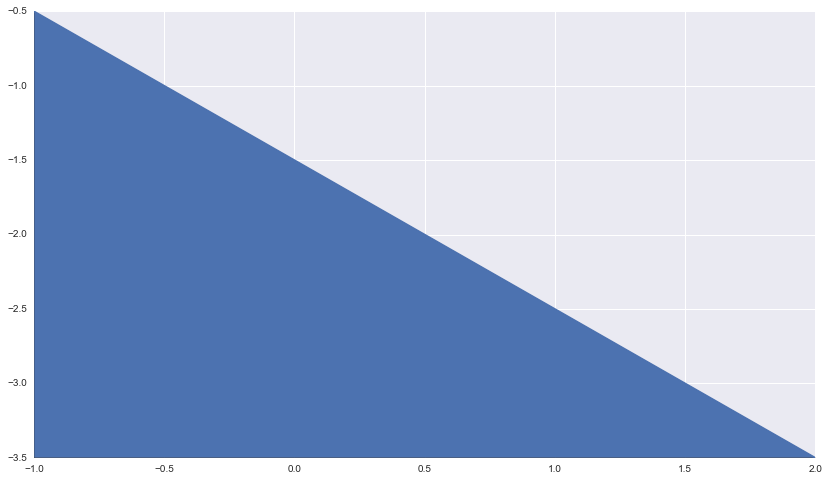

In [20]:
showconstraint(showregion=True, showlevel=False)

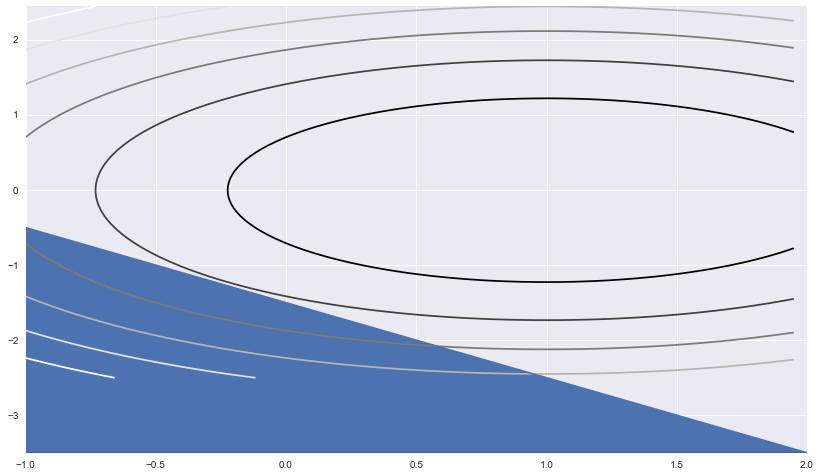

In [21]:
showconstraint(showregion=True, showlevel=True)

Let's first check the numerical solution to the problem using computer search algorism. 

(note: algorism uses minimization of $-f(x)$ with inequality constraint $g(x)>=b$, but solution is the same. )

In [31]:
# The program actually flip the function and constraint and do a minimization, solution the same
print('numerical solution for the equivalent constrained minimization problem:\n')
cons = ({'type': 'ineq',
         'fun' : lambda x: np.array([-x[1] - x[0]- 1.5])})

def f(x):
    return ((x[0]-1)**2 + (x[1])**2)
cx = opt.minimize(f, [0.5, -2], constraints=cons)
cx

numerical solution for the equivalent constrained minimization problem:



  status: 0
 success: True
    njev: 2
    nfev: 9
     fun: 3.1249999999999911
       x: array([-0.25, -1.25])
 message: 'Optimization terminated successfully.'
     jac: array([-2.5, -2.5,  0. ])
     nit: 2

### Analytical solution: The lagrangian

$$ \max_{x_{1}, x_{2}} f(x_{1}, x_{2}) \quad s.t., g(x_{1}, x_{2})<=b $$
$$ \max L(x_{1}, x_{2}, \lambda)_{x_{1}, x_{2}, \lambda} = f(x_{1}, x_{2}) -\lambda[g(x_{1}, x_{2})-b] $$

FOC

$$ \dfrac{\partial L}{\partial x_{1}} = 0 $$
$$ \dfrac{\partial L}{\partial x_{2}} = 0 $$

and binding constraint 
$$ g(x_{1}, x_{2})=b \quad \text{when } \lambda > 0  $$

In our example $$ \max \quad -((x_{1}-1)^{2}+ x_{2}^{2})  $$
such that $$x_{1}+x_{2} \leq -1.5$$

 $$L = \max \quad -((x_{1}-1)^{2}+ x_{2}^{2})- \lambda(x_{1}+x_{2} +1.5) $$
FOC
$$ -2(x_{1}-1)-\lambda =0 $$
$$ -2x_{2}-\lambda = 0 $$
We get 
$$ x_{1}-1-x_{2}=0$$
together with 
$$x_{1}+x_{2} = -1.5$$
$$ x_{1}=-0.25 , x_{2}=-1.25$$
You can check that $\lambda = 2.5 > 0$. The solution is the same as our numeric finding.

In [32]:
# maximized value
print('maximized value:\n')
-(-0.25-1)**2-(-1.25)**2

maximized value:



-3.125

Comment:
* $\lambda $ measures the sensitivity of $f$ to changes to $b$.
* Constraint could be binding ($\lambda^{*}>0$) or not binding ($\lambda^{*}=0$).
* Generally, we need also SOC. Fortunately, most of finance problems have binding constraint and satisfies SOC.
* similar method can be used for multidimensional $x$ and multiple constraints (multiple $\lambda$).